In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from umap import UMAP
from trimap import TRIMAP
from pacmap import PaCMAP

generowanie fig - to będzie do zmiany

In [2]:

## kod pożyczony
# (można sprawdzić, czy napewno dobry w wielu wymiarach)
# torus
def generate_n_dimensional_torus(n_dimensions, n_points, R=2, r=1):
    """
    Creates an n-dimensional torus.

    Parameters:
    n_dimensions : int
        The number of dimensions for the torus. Must be greater than or equal to 2.
    n_points : int
        The number of points.
    R : float
        The distance from the center of the tube to the center of the torus.
    r : float
        The radius of the tube (distance from the center of the tube to the torus surface).

    Returns:
    numpy.ndarray
        The n-dimensional points of the torus.
    """

    assert n_dimensions >= 2, "Number of dimensions must be greater than or equal to 2."

    # generate n_points random angles for each dimension
    angles = np.random.uniform(0, 2*np.pi, (n_points, n_dimensions))

    # calculate the n-dimensional points on the torus
    coordinates = []
    for i in range(n_dimensions):
        if i == 0:
            coordinate = (R + r * np.cos(angles[:, 1])) * np.cos(angles[:, 0])
        elif i == 1:
            coordinate = (R + r * np.cos(angles[:, 1])) * np.sin(angles[:, 0])
        else:
            coordinate = r * np.sin(angles[:, i])
        coordinates.append(coordinate)

    return np.array(coordinates).T

#https://blogs.sas.com/content/iml/2016/04/06/generate-points-uniformly-in-ball.html
def ball_points_generator(dim, N, radius):
    # Generowanie macierzy zmiennych losowych o rozkładzie normalnym standardowym
    xi = np.random.normal(size=(dim, N))

    # obliczanie normy
    norm = np.linalg.norm(xi, axis=0)

    S = xi / norm
    U = np.random.uniform(low=0.0, high=1.0, size=N)
    S = S * np.power(U, 1/dim)
    points = S * radius

    # Transponowanie macierzy punktów
    # points = scaled_xi.T

    return points.T

def sphere_points_generator(dim, N, radius):
    # Generowanie macierzy zmiennych losowych o rozkładzie normalnym standardowym
    xi = np.random.normal(size=(dim, N))

    # Obliczanie sumy kwadratów zmiennych losowych dla każdego punktu
    sum_of_squares = np.sum(xi**2, axis=0)

    # Obliczanie wartości λ na podstawie żądanej wartości
    lambda_squared = radius**2

    # Skalowanie zmiennych losowych dla każdego punktu, aby uzyskać żądaną wartość λ
    scaled_xi = xi * np.sqrt(lambda_squared / sum_of_squares)

    # Transponowanie macierzy punktów
    # unit_vectors = scaled_xi.T

    # return unit_vecto
    return scaled_xi.T

redukcja wymiarowości

In [3]:
def TSNE_reduce(data):
    tsne = TSNE()
    return tsne.fit_transform(data)

def Umap_reduce(data):
    umap = UMAP()
    return umap.fit_transform(data)

def Trimap_reduce(data):
    trimap = TRIMAP()
    return trimap.fit_transform(data)

def Pacmap_reduce(data):
    pacmap = PaCMAP()
    return pacmap.fit_transform(data)

# def IVHD_reduce(data):
#     ...



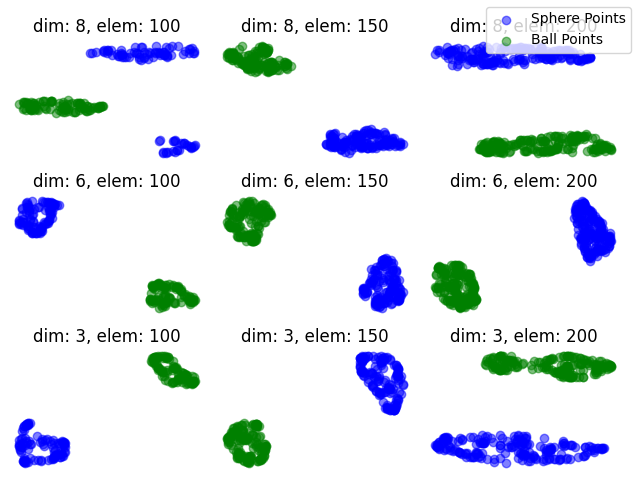

In [4]:
def show_plot(reduction_method):
    dimensions = [8, 6, 3]
    emem = [100, 150, 200]
    colors = ['b', 'g', 'r']  # Define colors for each set

    fig, axes = plt.subplots(len(dimensions), len(emem))

    for i, d in enumerate(dimensions):
        for j, e in enumerate(emem):
            #show_plot(TSNE_reduce)
            sphere_points = sphere_points_generator(d, e, 5)
            ball_points = ball_points_generator(d, e, 2)
            data = np.concatenate((sphere_points, ball_points))

            # tsne
            reduced = reduction_method(data)

            # Plot in the corresponding subplot
            axes[i, j].set_title(f"dim: {d}, elem: {e}")
            axes[i, j].axis('off')

            # Assign colors based on the sets
            axes[i, j].scatter(reduced[:e, 0], reduced[:e, 1], c=colors[0], alpha=0.5, label='Sphere Points')
            axes[i, j].scatter(reduced[e:, 0], reduced[e:, 1], c=colors[1], alpha=0.5, label='Ball Points')

    plt.tight_layout()

    # Create a single legend for all plots
    handles, labels = axes[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels)

    plt.show()


show_plot(Trimap_reduce)

In [5]:
## losowe generowanie

#kulka i 2 sfery
def ball_two_sphere(dim,points):
    sphere_points = sphere_points_generator(dim, points, 5)
    sphere_points2 = sphere_points_generator(dim, points, 7)
    ball_points = ball_points_generator(dim, points, 2)
    return np.concatenate((sphere_points, sphere_points2, ball_points)), 3

#one sphere one ball
def ball_sphere(dim,points):
        sphere_points = sphere_points_generator(dim, points, 5)
        ball_points = ball_points_generator(dim, points, 2)
        return  np.concatenate((sphere_points, ball_points)), 2


In [12]:


def show_plot(reduction_method, data):
    dimensions = [8, 6, 3]
    emem = [1000, 1500, 2000]
    colors = ['b', 'g', 'r']  # Define colors for each set

    fig, axes = plt.subplots(len(dimensions), len(emem))

    for i, d in enumerate(dimensions):
        for j, e in enumerate(emem):
            # tsne
            dataset, object_count = data(d,e)
            reduced = reduction_method(dataset)

            # Plot in the corresponding subplot
            axes[i, j].set_title(f"dim: {d}, elem: {e}")
            axes[i, j].axis('off')


            #if object_count == 2:
            if object_count==2:
                # Assign colors based on the sets
                axes[i, j].scatter(reduced[:e, 0], reduced[:e, 1], c=colors[0], alpha=0.5, label='Sphere Points')
                axes[i, j].scatter(reduced[e:, 0], reduced[e:, 1], c=colors[1], alpha=0.5, label='Ball Points')
            else:
                axes[i, j].scatter(reduced[:e, 0], reduced[:e, 1], c=colors[1], alpha=0.5, label='Sphere Points')
                axes[i, j].scatter(reduced[e:2*e, 0], reduced[e:2*e, 1], c=colors[0], alpha=0.5, label='Sphere Points')
                axes[i, j].scatter(reduced[2*e:, 0], reduced[2*e:, 1], c=colors[2], alpha=0.5, label='Ball Points')


    plt.tight_layout()

    # Create a single legend for all plots
    handles, labels = axes[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels)

    plt.show()

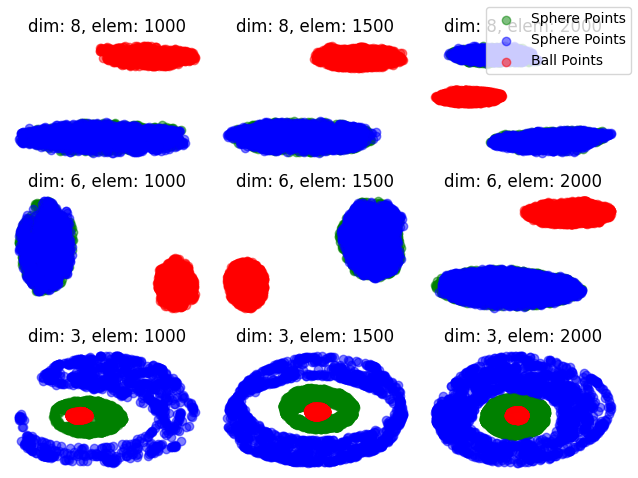

In [13]:
show_plot(Trimap_reduce,ball_two_sphere)

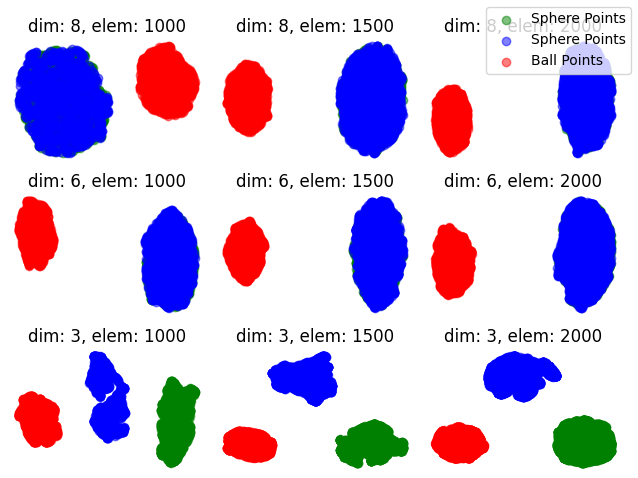

In [14]:
show_plot(Umap_reduce,ball_two_sphere)


TSNE
ball_sphere


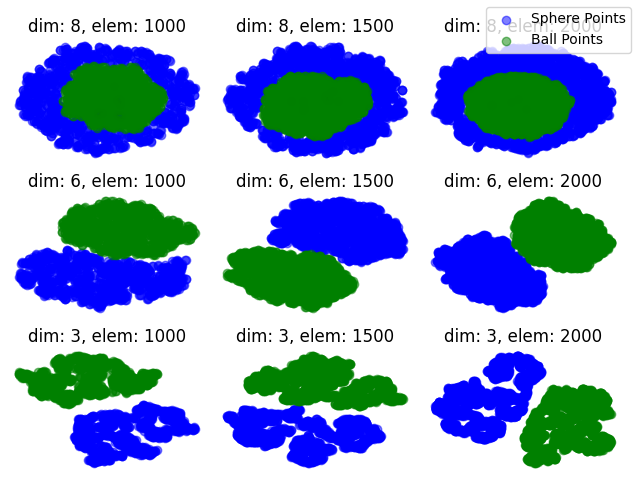

ball_two_sphere


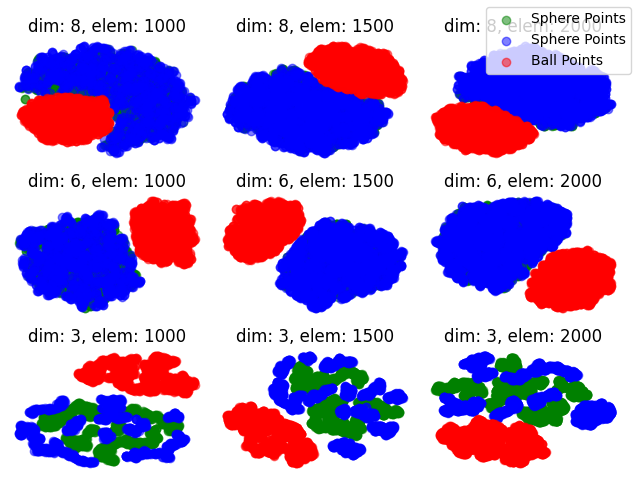

Umap
ball_sphere


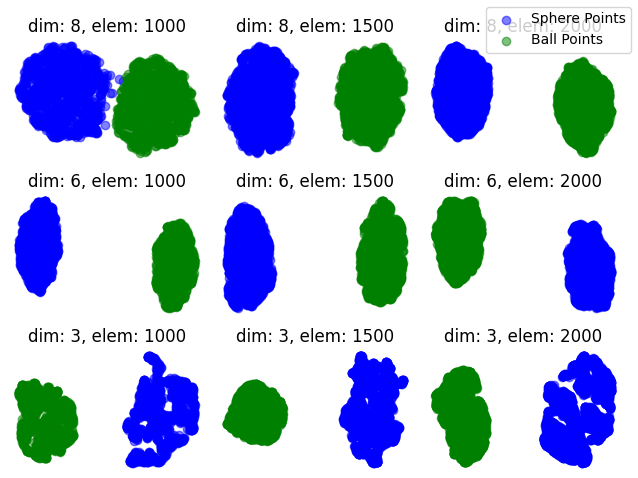

ball_two_sphere


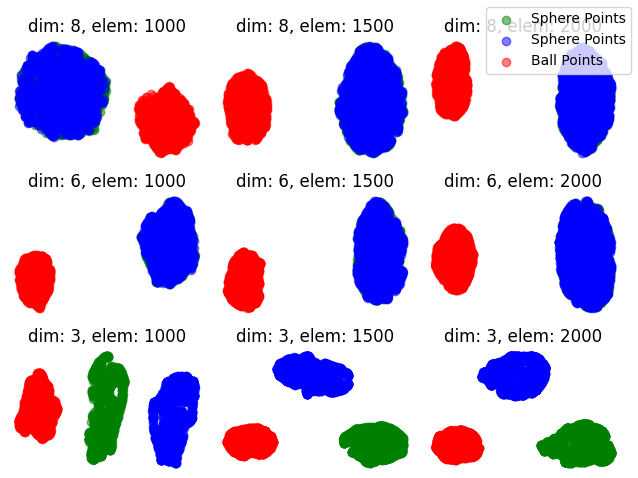

Trimap
ball_sphere


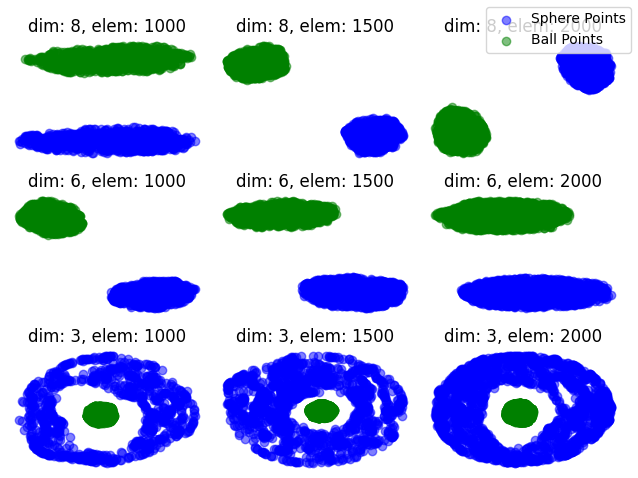

ball_two_sphere


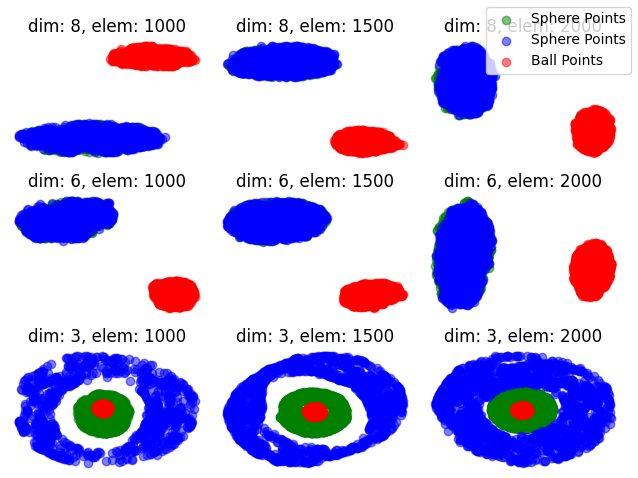

Pacmap
ball_sphere


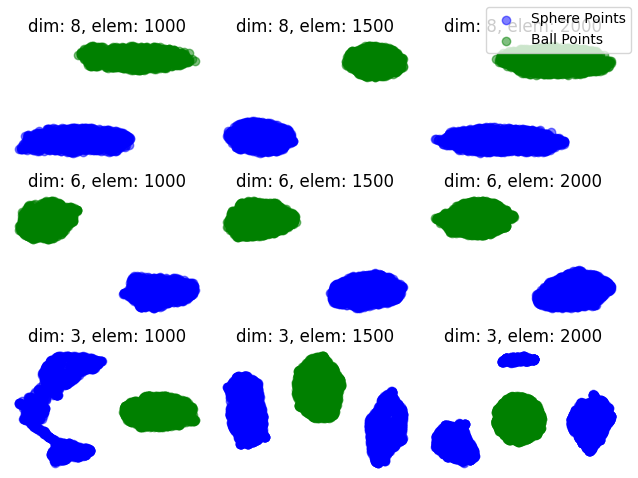

ball_two_sphere


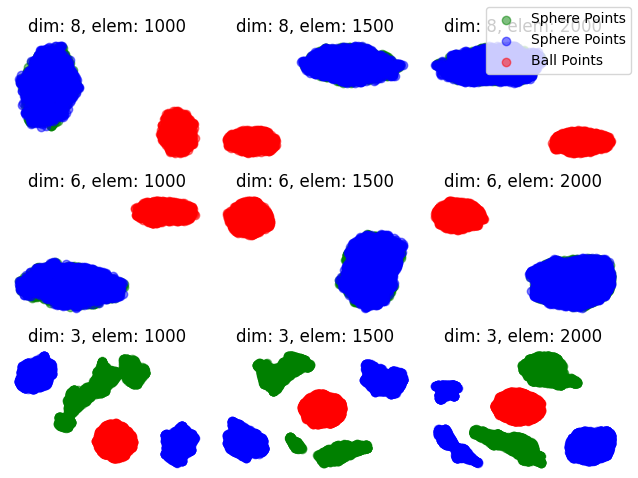

In [15]:
reduction_dict = { "TSNE": TSNE_reduce,"Umap":Umap_reduce,"Trimap":Trimap_reduce,"Pacmap":Pacmap_reduce}
figure_dict = {"ball_sphere" : ball_sphere, "ball_two_sphere": ball_two_sphere}
for reduction_name, reduction_m in reduction_dict.items():
    print(reduction_name)
    for figure_name, generate_figure in figure_dict.items():
        print(figure_name)
        show_plot(reduction_m, generate_figure)


In [51]:
####to jest na razie on hold

In [68]:
def show_plot(reduction_method,data, dimensions, points_list):
    colors = ['b', 'g', 'r']  # Define colors for each set

    fig, axes = plt.subplots(len(dimensions), len(points_list))

    for i, d in enumerate(dimensions):
        for j, e in enumerate(points_list):
            # tsne
            reduced = reduction_method(data)

            # Plot in the corresponding subplot
            axes[i, j].set_title(f"dim: {d}, elem: {e}")
            axes[i, j].axis('off')

            # Assign colors based on the sets
            axes[i, j].scatter(reduced[:e, 0], reduced[:e, 1], c=colors[0], alpha=0.5, label='Sphere Points')
            axes[i, j].scatter(reduced[e:, 0], reduced[e:, 1], c=colors[1], alpha=0.5, label='Ball Points')

    plt.tight_layout()

    # Create a single legend for all plots
    handles, labels = axes[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels)

    plt.show()




In [70]:
import os
import numpy as np
import csv
import re




def read_directory_to_ndarrays(directory_path, delimiter=','):
    try:
        file_data = {}

        # Iterate over all files in the directory
        for file_name in os.listdir(directory_path):
            file_path = os.path.join(directory_path, file_name)

            # Read the CSV file using the csv module
            with open(file_path, 'r') as file:
                reader = csv.reader(file, delimiter=delimiter)
                data_list = list(reader)

            # Convert the data into a NumPy ndarray
            data_array = np.array(data_list)

            # Store the ndarray with the corresponding file name
            file_data[file_name] = data_array

        return file_data

    except IOError as e:
        print("Error reading the directory:", str(e))
        return None


directory_path = 'M:/Studia/nie/DataVisualizationProject-main/datasets/one_sphere_one_torus_inside'
data_dict = read_directory_to_ndarrays(directory_path)



if data_dict is not None:
    for file_name, data in data_dict.items():
        print("File name:", file_name)
        matches = re.findall(r'\d+', file_name)
        numbers = [int(match) for match in matches]
        print(data)
        show_plot(Trimap_reduce, data)








File name: dim_3_points_1000.csv
[['' '0' '1' '2']
 ['0' '3.699073231617392' '0.3456737950187197' '-1.4823517985178218']
 ['1' '1.9395210405461627' '-3.352002831251895' '1.0011668954565036']
 ...
 ['1997' '-2.114164525325925' '2.0407109703056796' '-0.00843181153010503']
 ['1998' '1.4748857219958196' '1.9206810919387742' '-0.402852165494537']
 ['1999' '-2.0993565836728676' '-2.131429187810068' '-0.5269173602500481']]


TypeError: show_plot() missing 2 required positional arguments: 'dimensions' and 'points_list'